In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
import statistics

In [2]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import Input, LocallyConnected1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import LocallyConnected2D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger,LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [3]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU,SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [5]:
# if tf.test.gpu_device_name(): 

#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

# else:

#    print("Please install GPU version of TF")

In [6]:
# import psutil
# import humanize
# # import os
# # import GPUtil as GPU
# GPUs = GPU.getGPUs()
# # XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def printm():
#  process = psutil.Process(os.getpid())
#  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
#  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm()

In [7]:
#if tf.test.gpu_device_name():
#    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
#else:
#    print("Please install GPU version of TF")

In [8]:
#print(tf.test.is_built_with_cuda())

In [9]:
#sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

In [10]:
import tensorflow as tf 

#if tf.test.gpu_device_name(): 
#
#   print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

#else:

#  print("Please install GPU version of TF")

In [11]:
#tf.test.gpu_device_name()

In [12]:
#gpu_available = tf.config.list_physical_devices('GPU')
#is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
#is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))
#print(is_cuda_gpu_min_3)

In [13]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [15]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'Class_label']


In [16]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train

In [17]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [18]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [19]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [20]:
 pd.options.display.float_format = "{:,.5f}".format

In [21]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [22]:
# import os
path='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_naveen/Total_process_TT/'

In [23]:
# file_path_train=path+'Train_data'+'.'+'csv'
file_path_train=path+'nina_pro_naveen_DB1_Train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_naveen/Total_process_TT/nina_pro_naveen_DB1_Train.csv


In [24]:
file_path_test=path+'nina_pro_naveen_DB1_Test'+'.'+'csv'
# file_path_test=path+'Test_data'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_naveen/Total_process_TT/nina_pro_naveen_DB1_Test.csv


In [25]:
df_Train=read_data_Train(file_path_train)
show_basic_dataframe_info(df_Train)
df_Train.head(5)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 4914000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00720,0.00242,0.00493,0.00242,0.00245,0.00241,0.00308,0.01634,0.00241,0.00247,1.00000
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000
2,0.00949,0.00243,0.00464,0.00242,0.00246,0.00241,0.00317,0.01762,0.00241,0.00248,1.00000
3,0.01052,0.00243,0.00451,0.00242,0.00246,0.00241,0.00322,0.01822,0.00242,0.00248,1.00000
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01877,0.00242,0.00248,1.00000


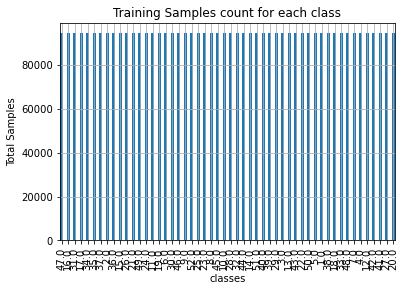

In [26]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [27]:
df_Test=read_data_Test(file_path_test)
show_basic_dataframe_info(df_Test)
df_Test.head(5)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 2106000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.03176,0.00247,0.00243,0.00240,0.00244,0.00240,0.00257,0.03562,0.00244,0.00241,1.00000
1,0.03205,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000
2,0.03234,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03569,0.00244,0.00241,1.00000
3,0.03261,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03566,0.00245,0.00241,1.00000


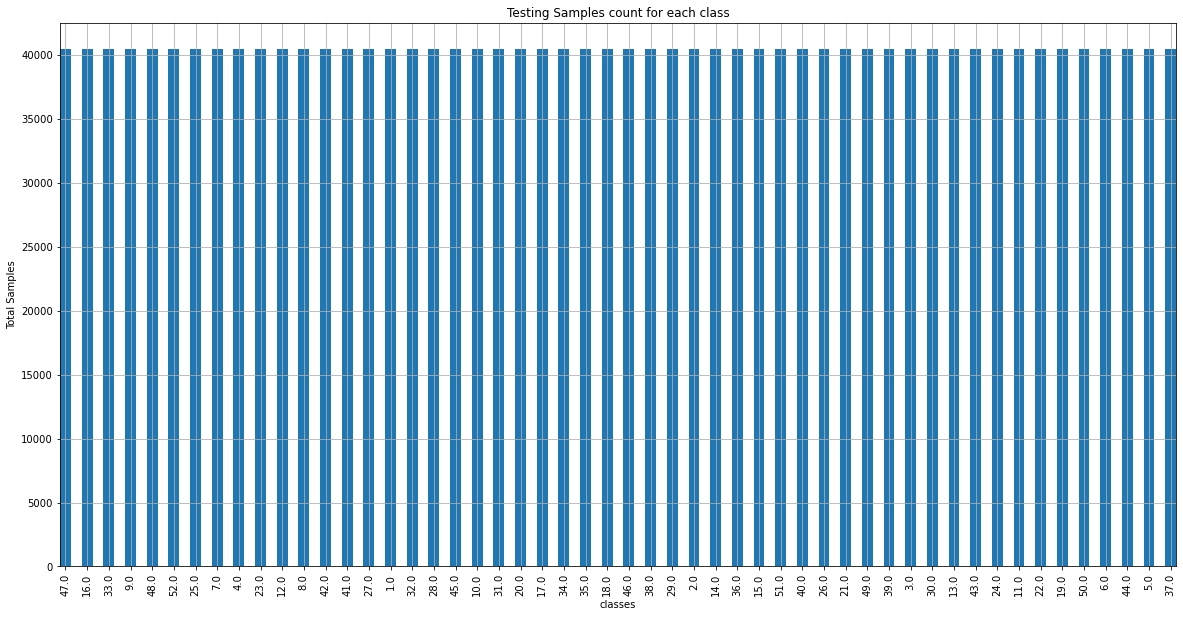

In [28]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [29]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())

In [30]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label,ActivityEncoded
0,0.00720,0.00242,0.00493,0.00242,0.00245,0.00241,0.00308,0.01634,0.00241,0.00247,1.00000,0
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000,0
2,0.00949,0.00243,0.00464,0.00242,0.00246,0.00241,0.00317,0.01762,0.00241,0.00248,1.00000,0
3,0.01052,0.00243,0.00451,0.00242,0.00246,0.00241,0.00322,0.01822,0.00242,0.00248,1.00000,0
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01877,0.00242,0.00248,1.00000,0


In [31]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [32]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [33]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label,ActivityEncoded
0,-0.67597,-0.64137,-0.51809,-0.43726,-0.37267,-0.45614,-0.76033,-0.90886,-0.51943,-0.77849,1.00000,0
1,-0.67360,-0.64137,-0.51846,-0.43725,-0.37263,-0.45613,-0.76027,-0.90759,-0.51942,-0.77848,1.00000,0
2,-0.67130,-0.64136,-0.51882,-0.43725,-0.37260,-0.45613,-0.76019,-0.90634,-0.51942,-0.77847,1.00000,0
3,-0.66919,-0.64136,-0.51915,-0.43724,-0.37256,-0.45613,-0.76012,-0.90516,-0.51942,-0.77846,1.00000,0
4,-0.66736,-0.64135,-0.51946,-0.43724,-0.37252,-0.45612,-0.76004,-0.90409,-0.51942,-0.77845,1.00000,0


In [34]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label,ActivityEncoded
0,0.03176,0.00247,0.00243,0.00240,0.00244,0.00240,0.00257,0.03562,0.00244,0.00241,1.00000,0
1,0.03205,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000,0
2,0.03234,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03569,0.00244,0.00241,1.00000,0
3,0.03261,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000,0
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03566,0.00245,0.00241,1.00000,0


In [35]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [36]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label,ActivityEncoded
0,-0.62585,-0.64122,-0.52438,-0.43732,-0.37277,-0.45618,-0.76115,-0.87110,-0.51936,-0.77862,1.00000,0
1,-0.62526,-0.64121,-0.52435,-0.43732,-0.37266,-0.45618,-0.76114,-0.87102,-0.51936,-0.77862,1.00000,0
2,-0.62467,-0.64120,-0.52433,-0.43731,-0.37256,-0.45618,-0.76112,-0.87096,-0.51935,-0.77862,1.00000,0
3,-0.62412,-0.64119,-0.52432,-0.43731,-0.37252,-0.45618,-0.76110,-0.87095,-0.51935,-0.77862,1.00000,0
4,-0.62363,-0.64117,-0.52432,-0.43731,-0.37250,-0.45618,-0.76109,-0.87102,-0.51934,-0.77862,1.00000,0


In [98]:
# The number of steps within one time segment
TIME_PERIODS = 500
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 500
N_FEATURES = 10

In [99]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print('num_time_periods',num_time_periods)
print('num_sensors',num_sensors)
num_classes = le.classes_.size
print('class_list',list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (9827, 500, 10)
9827 training samples
y_train shape:  (9827,)
num_time_periods 500
num_sensors 10
class_list [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (500, 10)
input_shape: (500, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (9827, 52)


In [100]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (4211, 500, 10)
4211 testing samples
y_test shape:  (4211,)


In [101]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
#n_steps, n_length = 20, 25
n_depth=10
#x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
#print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
#x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
#print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
#print('n_outputs',n_outputs)
# input_shape = (n_steps, n_length,n_depth)

In [102]:
#n_vector =  n_length*n_depth
#x_train = x_train.reshape(x_train.shape[0], n_steps, n_vector)
#print('x_train shape: ', x_train.shape)
#x_test = x_test.reshape(x_test.shape[0], n_steps, n_vector)
#print('x_test shape: ', x_test.shape)

In [103]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [104]:
def step_decay(epoch):
  initial_lrate = 1e-5
  drop = 0.1
  epochs_drop = 70.0
  lrate = initial_lrate * tf.math.pow(drop,  
          tf.math.floor((1+epoch)/epochs_drop))
  return lrate

In [105]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [106]:
#seq_len = n_steps
seq_len = x_train.shape[1]
n_channel = x_train.shape[-1]
n_vector = 64
d_k = 64
d_v = 64
n_heads = 8
ff_dim = 2048
# ff_dim2 = 1024
N_depth = 4

In [107]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [108]:
#@save
# class PositionWiseFFN(tf.keras.layers.Layer):
#     """Positionwise feed-forward network."""
#     def __init__(self, ffn_num_hiddens, ffn_num_outputs, **kwargs):
#         super().__init__(*kwargs)
#         self.dense1 = tf.keras.layers.Dense(ffn_num_hiddens)
#         self.relu = tf.keras.layers.ReLU()
#         self.dense2 = tf.keras.layers.Dense(ffn_num_outputs)

#     def call(self, X):
#         return self.dense2(self.relu(self.dense1(X)))

In [109]:
# 22 Transformer encoder
class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.3, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)
    # print('input_shape',inputshape)
#     self.ffn = PositionWiseFFN(self.ff_dim, input_shape[0][-1])
    self.ff_dense1 = Dense(self.ff_dim,input_shape=input_shape,activation="tanh")
    self.ff_dense2 = Dense(input_shape[0][-1],input_shape=input_shape,activation="tanh")
#     self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, padding="same", activation='relu')
#     self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], padding="same", kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_out = self.attn_normalize(inputs[0] + attn_layer)

#     ff_layer = self.ffn(attn_out)
    ff_layer = self.ff_dense1(attn_out)
    ff_layer = self.ff_dense2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_out = self.ff_normalize(attn_out + ff_layer)
#     print("ff_layer",ff_layer.shape)
    return ff_out 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
#                    'ff_dim2': self.ff_dim2,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config  

In [110]:
# 23 Single and multiattention functions
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out    

In [111]:
class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear 

In [112]:
# 24 Time to vector conversion
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [113]:
# 25 model creation
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  # print('time_embedding',time_embedding)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer5 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer6 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  #attn_layer7 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  #attn_layer8 = TransformerEncoder(d_k, d_v, n_heads, ff_dim) 
  #Conv1 = Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
       #                    input_shape=(none, n_steps,n_vector)) 
#   print("d_k",d_k)
#   print("d_v",d_v)
#   print("n_head",n_heads)
#   print("ff_dim",ff_dim)
#   pause  
  '''Construct model'''
  in_seq = Input(shape=(seq_len, n_channel))
  x = in_seq
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
  x = Conv1D(n_vector, 9, padding='same', kernel_initializer='he_normal')(x)
  x = Conv1D(n_vector, 5, padding='same', kernel_initializer='he_normal')(x)
#   y = Conv1D(512, 3, padding='same', kernel_initializer='he_normal')(x) 
#   print("x_shape",x.shape)
#   pause  
  x1 = time_embedding(in_seq)
  x = Concatenate(axis=-1)([x, x1])
#   x = attn_layer1((x, x, x))
#   x = attn_layer2((x, x, x))
#   x = attn_layer3((x, x, x))
#   x = attn_layer4((x, x, x))
#   x = Conv1D(64, 3, padding='same', kernel_initializer='he_normal')(x)
#   y = Conv1D(64, 5, padding='same', kernel_initializer='he_normal')(x)   
  
#   
#   x = attn_layer4((x, x, x))
#   x = attn_layer5((x, x, x))
#   x = attn_layer6((x, x, x))
#   x = attn_layer7((x, x, x))
#   x = attn_layer8((x, x, x))
#   x = attn_layer3((x, x, x))  
  for n in range(N_depth):  
        x = attn_layer1((x, x, x))
#   x = GlobalAveragePooling1D(data_format='channels_last')(x)
#   print("x_shape",x.shape)  
#   print("x_shape",x.shape) 
  x = Bidirectional(LSTM(200,return_sequences=True))(x)
  x = Dropout(0.3)(x)
  x = Bidirectional(LSTM(200,return_sequences=True))(x)
  x = Dropout(0.3)(x)
#   x = GlobalAveragePooling1D(data_format='channels_last')(x)
  x = Flatten()(x)
#   x = Flatten()(x)
  #x = Dense(2048, activation='tanh')(x)
  #x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
#   x = Flatten()(x)
  x = Dropout(0.5)(x)
  x = Dense(1024, activation='tanh')(x)
  x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
  x = Dropout(0.5)(x)  
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.3)(x)
  out = Dense(n_outputs, activation='softmax')(x)

  model = Model(inputs=in_seq, outputs=out)
  # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [114]:
# 26 model summary
model = create_model()
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [116]:
adam=optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB1_codes/transformer/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 500, 10)]    0                                            
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 500, 64)      5824        input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 500, 64)      20544       conv1d_12[0][0]                  
__________________________________________________________________________________________________
time2_vector_6 (Time2Vector)    (None, 500, 2)       2000        input_7[0][0]                    
____________________________________________________________________________________________

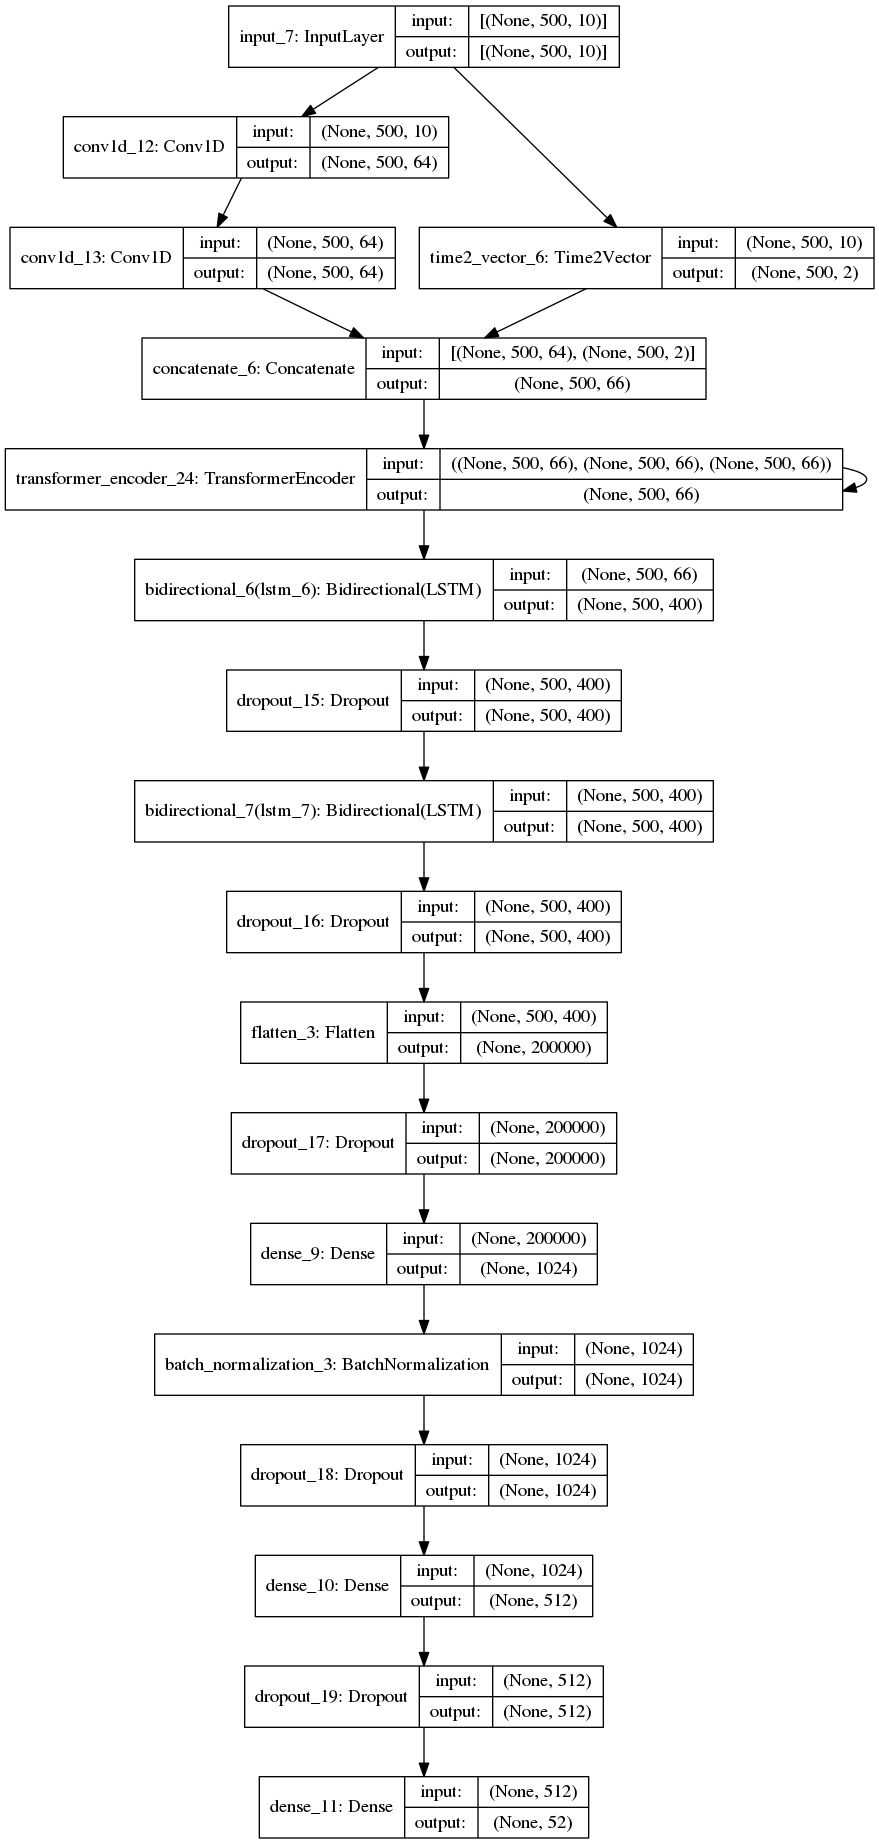

In [117]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/transformer/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [115]:
verbose, epochs, batch_size = 0, 200, 32

In [118]:
# adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# sgd=tfa.optimizers.SGDW(weight_decay=0.0001,learning_rate=0.1, momentum=0.9, nesterov=False, name='SGDW')
# sgd=tf.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False, name='SGD')
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB1_codes/transformer/CNN_nina_20X10.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/200
308/308 [==============================] - 248s 733ms/step - loss: 4.7912 - accuracy: 0.0403 - val_loss: 2.9340 - val_accuracy: 0.2209

Epoch 00001: val_accuracy improved from -inf to 0.22085, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/transformer/checkpoint.hdf5
Epoch 2/200
308/308 [==============================] - 215s 697ms/step - loss: 3.8303 - accuracy: 0.1361 - val_loss: 2.5028 - val_accuracy: 0.3213

Epoch 00002: val_accuracy improved from 0.22085 to 0.32130, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/transformer/checkpoint.hdf5
Epoch 3/200
308/308 [==============================] - 215s 697ms/step - loss: 3.3642 - accuracy: 0.1993 - val_loss: 2.1578 - val_accuracy: 0.4073

Epoch 00003: val_accuracy improved from 0.32130 to 0.40727, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/transformer/checkpoint.hdf5
Epoch 4/200
308/308 [==============================] - 215s 697ms/step - loss: 3.0579 - accuracy: 0.2381 - val_loss: 1

308/308 [==============================] - 211s 685ms/step - loss: 0.6923 - accuracy: 0.7930 - val_loss: 0.5124 - val_accuracy: 0.8490

Epoch 00029: val_accuracy improved from 0.84659 to 0.84897, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/transformer/checkpoint.hdf5
Epoch 30/200
308/308 [==============================] - 211s 686ms/step - loss: 0.6424 - accuracy: 0.8103 - val_loss: 0.4928 - val_accuracy: 0.8561

Epoch 00030: val_accuracy improved from 0.84897 to 0.85609, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/transformer/checkpoint.hdf5
Epoch 31/200
308/308 [==============================] - 210s 683ms/step - loss: 0.6299 - accuracy: 0.8088 - val_loss: 0.5044 - val_accuracy: 0.8504

Epoch 00031: val_accuracy did not improve from 0.85609
Epoch 32/200
308/308 [==============================] - 211s 686ms/step - loss: 0.5750 - accuracy: 0.8304 - val_loss: 0.4811 - val_accuracy: 0.8599

Epoch 00032: val_accuracy improved from 0.85609 to 0.85989, saving m

308/308 [==============================] - 205s 666ms/step - loss: 0.1651 - accuracy: 0.9542 - val_loss: 0.3699 - val_accuracy: 0.8950

Epoch 00063: val_accuracy did not improve from 0.90074
Epoch 64/200
308/308 [==============================] - 205s 665ms/step - loss: 0.1452 - accuracy: 0.9626 - val_loss: 0.3701 - val_accuracy: 0.8960

Epoch 00064: val_accuracy did not improve from 0.90074
Epoch 65/200
308/308 [==============================] - 205s 665ms/step - loss: 0.1375 - accuracy: 0.9648 - val_loss: 0.3662 - val_accuracy: 0.8969

Epoch 00065: val_accuracy did not improve from 0.90074
Epoch 66/200
308/308 [==============================] - 205s 666ms/step - loss: 0.1417 - accuracy: 0.9629 - val_loss: 0.3682 - val_accuracy: 0.8967

Epoch 00066: val_accuracy did not improve from 0.90074
Epoch 67/200
308/308 [==============================] - 205s 665ms/step - loss: 0.1442 - accuracy: 0.9610 - val_loss: 0.3710 - val_accuracy: 0.8938

Epoch 00067: val_accuracy did not improve from 0

308/308 [==============================] - 217s 705ms/step - loss: 0.0668 - accuracy: 0.9845 - val_loss: 0.3427 - val_accuracy: 0.9081

Epoch 00100: val_accuracy did not improve from 0.90857
Epoch 101/200
308/308 [==============================] - 216s 702ms/step - loss: 0.0789 - accuracy: 0.9843 - val_loss: 0.3391 - val_accuracy: 0.9071

Epoch 00101: val_accuracy did not improve from 0.90857
Epoch 102/200
308/308 [==============================] - 219s 711ms/step - loss: 0.0759 - accuracy: 0.9826 - val_loss: 0.3413 - val_accuracy: 0.9076

Epoch 00102: val_accuracy did not improve from 0.90857
Epoch 103/200
308/308 [==============================] - 219s 710ms/step - loss: 0.0700 - accuracy: 0.9841 - val_loss: 0.3391 - val_accuracy: 0.9093

Epoch 00103: val_accuracy improved from 0.90857 to 0.90929, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/transformer/checkpoint.hdf5
Epoch 104/200
308/308 [==============================] - 214s 696ms/step - loss: 0.0722 - accuracy: 0.

KeyboardInterrupt: 

In [ ]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)

In [ ]:
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)
# test_acc.append(testaccuracy)

In [ ]:
model.save('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_naveen/CNN25X20/CNN_LSTM_nina_5X97')

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
DB1a=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= DB1a.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figDB1.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figDB1=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figDB1.add_axes(("left", "bottom", "width", "height"))
# ax= figDB1.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for NinaPro DB1',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
figDB1.savefig('/media/naveen/nav/plots/NinaPro_DB1_25X20.eps',transparent=False)
# figDB1.savefig('/media/naveen/nav/plots/NinaPro_DB1_25X20.pdf',transparent=False)

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# # 25 model creation
# def create_model():
#   '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
#   # print('time_embedding',time_embedding)
#   attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer5 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

#   '''Construct model'''
#   in_seq = Input(shape=(seq_len, n_vector))
#   x = in_seq
#   print("x_shape",x.shape)
#   x = time_embedding(in_seq)
#   print("x1_shape",x.shape)
#   x = Concatenate(axis=-1)([in_seq, x])
#   x = attn_layer1((x, x, x))
#   x = attn_layer2((x, x, x))
# #   x = attn_layer3((x, x, x))
# #   x = attn_layer4((x, x, x))
# #   x = attn_layer5((x, x, x))
# #   x = GlobalAveragePooling1D(data_format='channels_first')(x)
# #   x = TimeDistributed(Flatten())(x)
# # #   x = Flatten()(x)
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = Flatten()(x)
# #   time_embedding1 = Time2Vector(n_vector)
# #   y = tf.transpose(x,perm=[0,2, 1])
# # #   print("y_shape",y.shape)  
# # #   in_seq2 = Input(shape=(n_vector, seq_len))
# # #   y = in_seq2
# # #   y = time_embedding1(in_seq2)
# # #   y = Concatenate(axis=-1)([in_seq2, y])
# # #   print("y_shape",y.shape)  
# #   y = attn_layer3((y, y, y))
# #   y = attn_layer4((y, y, y))
    
#   x = Flatten()(x)
#   x = Dense(2048, activation='tanh')(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
# #   x1 = Flatten()(x1)
# #   x1 = Dropout(0.1)(x1)
# #   x1 = Dense(1024, activation='tanh')(x1)
# #   x1 = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x1)  
# #   x1 = Flatten()(x1)  

# #   y = Flatten()(y)
# #   y = Dense(2048, activation='tanh')(y)
# #   y = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(y)
# # #   y = Flatten()(y)
# # #   y = Dropout(0.1)(y)
# # #   y = Dense(1024, activation='tanh')(y)
# # #   y = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(y)  
# #   y = Flatten()(y) 
# # #   y = Dropout(0.1)(y)
# #   z = concatenate([x1, y])
#   x = Dense(1024, activation='tanh')(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
#   x = Dense(512, activation='relu')(x)
#   x = Dropout(0.1)(x)
#   out = Dense(n_outputs, activation='softmax')(x)

#   model = Model(inputs=in_seq, outputs=out)
#   # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#   # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model